# problem b)

a heuristic to be admissible to the A* search problem, the estimated cost must always be lower than or equal to the actual cost of reaching the goal state.\
for any p to goal p:H(p-q)<=C(p-q).


H(p-q) is estimate cost from p to goal\
C(p-q) is the actual cost fromp to reach a goal q 

node p to q(q is an adjacent to p):\
depend on C(p-q) = max(Ip-50,1)+max(Iq-50,1)\
the smallest cost C(p-q)>=2 \
greater than:\
the smallest Euclidean distance to adjacent: H(p-q) = 1

node p to q (q not an adjacent to p):\
depend on triangle theory\
the smallest cost C(p-q)>=4 \
greater than:\
the smallest heuristic H(p-q) = $\sqrt{2}$

we always have,from node p to q, H(p-q)<=C(p-q), so a heuristic is admissible.

# problem c)
if Euclidean distance heuristic H(p) = ||p-goal||is also monotone(consistent) with the graph,for any passed K, and goal P ,we should always have:\
H(p-q)<= C(p-k)+H(k-q)\
from the triangle theory:\
H(p-q)<=H(p-k)+H(k-q)\
from problem b,we have H(p-k) <= C(p-k)\
so we have:\
H(p-q)<=H(p-k)+H(k-q)<=C(p-k)+H(k-q)



In [1]:
import numpy as np
import matplotlib.image as im
import matplotlib.pyplot as plt

In [2]:
from pythonds.graphs import PriorityQueue, Graph, Vertex
def dijkstra(aGraph,start):
    pq = PriorityQueue()
    start.setDistance(0)
    pq.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not pq.isEmpty():
        currentVert = pq.delMin()
        for nextVert in currentVert.getConnections():
            newDist = currentVert.getDistance() \
                    + currentVert.getWeight(nextVert)
            if newDist < nextVert.getDistance():
                nextVert.setDistance( newDist )
                nextVert.setPred(currentVert)
                pq.decreaseKey(nextVert,newDist)

In [3]:
from pythonds.graphs import PriorityQueue, Graph, Vertex
def Astar(aGraph,start,stop,h):
    openset = PriorityQueue()
    closed = set()
#    open = set()
    start.setDistance(0)
    openset.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not openset.isEmpty():
        currentVert = openset.delMin()
#        open.remove(currentVert)
        if currentVert == stop:
            return currentVert
        closed.add(currentVert)
        for nextVert in currentVert.getConnections():
            if nextVert not in closed:
                newg = currentVert.getDistance() \
                        + currentVert.getWeight(nextVert)
                newDist = currentVert.getDistance() \
                        + currentVert.getWeight(nextVert) \
                        + h(nextVert)
                if newg < nextVert.getDistance():
                    nextVert.setDistance( newg)
                    nextVert.setPred(currentVert)
                    openset.decreaseKey(nextVert,newDist)
#                    if nextVert not in open:
#                        open.add(nextVert)

In [18]:
def h(node):
    y,x=node.getId()
    d = np.square(((i-14)**2+(j-104)**2))
    return d 

In [4]:
img1 = im.imread("D:/2021spring/statistic compute with python/hw06/retina.png")

In [5]:
import imageio
img = imageio.imread("D:/2021spring/statistic compute with python/hw06/retina.png")
y,x = img.shape
total_nodes = x*y
print(y,x,total_nodes)

210 189 39690


In [20]:
g = Graph()
for i in range(y):
    for j in range(x):
        if i <=208:
            if j<=187:
                wh1 = max(img[i][j]-50,1)+max(img[i][j+1]-50,1)
                g.addEdge((i,j),(i,j+1),wh1)
                g.addEdge((i,j+1),(i,j),wh1)
            
                wv1 = max(img[i][j]-50,1)+max(img[i+1][j]-50,1)
                g.addEdge((i,j),(i+1,j),wv1)
                g.addEdge((i+1,j),(i,j),wv1)            
            else:
                wh2 = max(img[i][j]-50,1)+max(img[i][j-1]-50,1)
                g.addEdge((i,j),(i,j-1),wh2)
                
                wv2 = max(img[i][j]-50,1)+max(img[i+1][j]-50,1)
                g.addEdge((i,j),(i+1,j),wv2)
                g.addEdge((i+1,j),(i,j),wv2)                
        else:
            if j<=187:
                wh3 = max(img[i][j]-50,1)+max(img[i][j+1]-50,1)
                g.addEdge((i,j),(i,j+1),wh3)
                g.addEdge((i,j+1),(i,j),wh3)
            
                wv3 = max(img[i][j]-50,1)+max(img[i-1][j]-50,1)
                g.addEdge((i,j),(i-1,j),wv3)          
            else:
                wh4 = max(img[i][j]-50,1)+max(img[i][j-1]-50,1)
                g.addEdge((i,j),(i,j-1),wh4)
                wv4 = max(img[i][j]-50,1)+max(img[i-1][j]-50,1)
                g.addEdge((i,j),(i-1,j),wv4)

In [21]:
for v in g:
    if v.getId()==(193,5):
        start_p = v
    elif v.getId() == (14,104):
        stop = v

In [38]:
from timeit import default_timer as timer
start=timer()
dijkstra(g,start_p)
end = timer()
print(end - start)

117.15518180000026


In [33]:
from timeit import default_timer as timer
start=timer()
endposition=Astar(g,start_p,stop,h)
end = timer()
print(end - start)

99.61839880000025


In [27]:
for v in g:
    if v.getId() == (14,104):
        stop_p = v
path_y=[]
path_x=[]
while stop_p.getId() != (193,5):
    y_,x_ = stop_p.getId()
    path_y.append(y_)
    path_x.append(x_)
    stop_p = stop_p.getPred()

problem a) Dijkstra’s algorithm need: 117.15518180000026


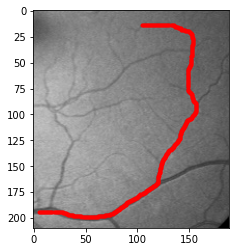

In [39]:
plt.figure
plt.imshow(img1)
plt.plot(path_x,path_y,'r.-')
print('problem a) Dijkstra’s algorithm need:',end - start)

In [34]:
path_y=[]
path_x=[]
while endposition.getId() != (193,5):    
    y_,x_ = endposition.getId()
    path_y.append(y_)
    path_x.append(x_)
    endposition= endposition.getPred()

problem a) A* search algorithm need: 99.61839880000025


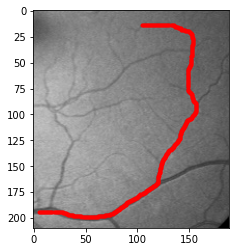

In [35]:
plt.figure
plt.imshow(img1)
plt.plot(path_x,path_y,'r.-')
print('problem d) A* search algorithm need:',end - start)

In [19]:
from pythonds.graphs import PriorityQueue, Graph, Vertex
def Astarpath(aGraph,start,stop,h):
    openset = PriorityQueue()
    closed = set()
    opening = set()
    opening.add(start)
    start.setDistance(0)
    openset.buildHeap([(v.getDistance(),v) for v in aGraph])
    while not openset.isEmpty():
        currentVert = openset.delMin()
        if currentVert == stop:
            return currentVert,opening,closed
        closed.add(currentVert)
        opening.remove(currentVert)
        for nextVert in currentVert.getConnections():
            if nextVert not in closed:  
                newg = currentVert.getDistance() \
                        + currentVert.getWeight(nextVert)
                newDist = currentVert.getDistance() \
                        + currentVert.getWeight(nextVert) \
                        + h(nextVert)
                if newg < nextVert.getDistance():
                    nextVert.setDistance( newg)
                    nextVert.setPred(currentVert)
                    openset.decreaseKey(nextVert,newDist)
                    if nextVert not in opening:
                        opening.add(nextVert)

In [22]:
endposition=Astarpath(g,start_p,stop,h)
endposi = endposition[0]
opening = endposition[1]
close = endposition[2]

In [23]:
path_y=[]
path_x=[]
while endposi.getId() != (193,5):    
    y_,x_ = endposi.getId()
    path_y.append(y_)
    path_x.append(x_)
    endposi= endposi.getPred()
path_y2=[]
path_x2=[]
for node in close:    
    y2_,x2_ = node.getId()
    path_y2.append(y2_)
    path_x2.append(x2_)
path_y1=[]
path_x1=[]
for node1 in opening:    
    y1_,x1_ = node1.getId()
    path_y1.append(y1_)
    path_x1.append(x1_)

problem e) yellow is close nodes,green is open nodes


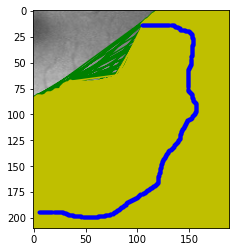

In [24]:
plt.figure
plt.imshow(img1)
print('problem e) yellow is close nodes,green is open nodes')
plt.plot(path_x1,path_y1,'g.-')
plt.plot(path_x2,path_y2,'y.-')
plt.plot(path_x,path_y,'b.-')